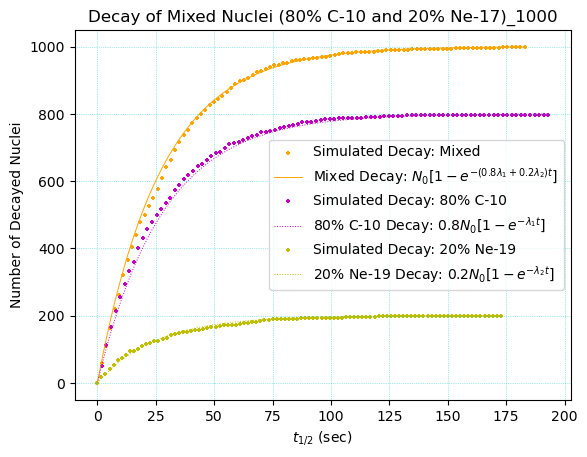

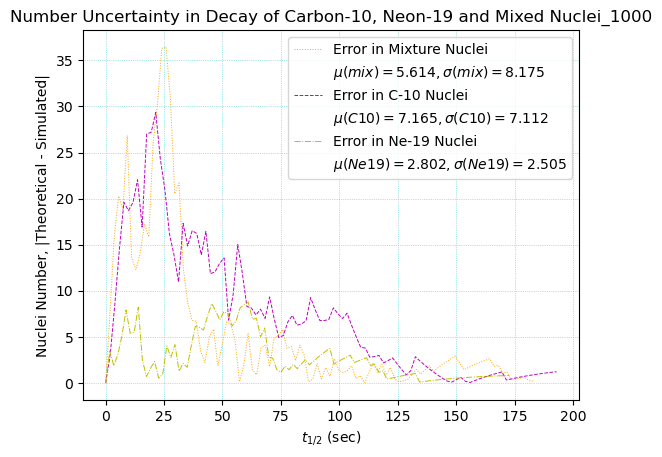

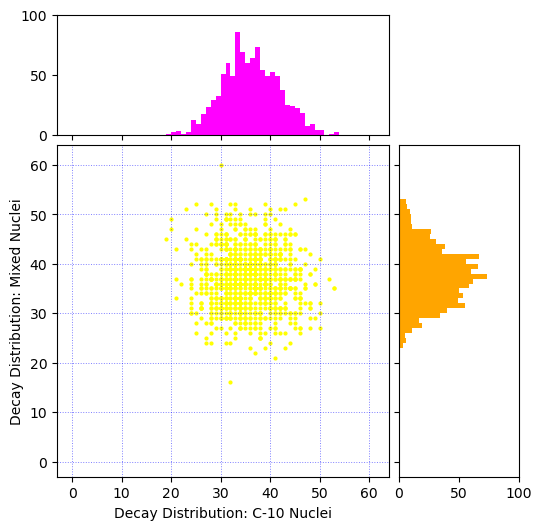

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt



def my_ran(rate):
    z = random.random()
    return -np.log(1 - z)/rate


N0 = 1000

N_life1 = []
N_life2 = []
N_life_mix = []

t_half1 = 19.3009
t_half2 = 17.274 # half life of Ne-17 nuclei
t_half_mix = (t_half1 + t_half2)/2.0

rate1 = np.log(2)/t_half1
rate2 = np.log(2)/t_half2
rate_mix = 0.8*rate1 + 0.2*rate2


for a in range(int(0.8*N0)):
    N_life1.append(my_ran(rate1))
for b in range(int(0.2*N0)):
    N_life2.append(my_ran(rate2))
for c in range(N0):
    N_life_mix.append(my_ran(rate_mix))

N_life1 = np.sort(np.array(N_life1))
N_life2 = np.sort(np.array(N_life2))
N_life_mix = np.sort(np.array(N_life_mix))

n_half_lives = 10
times1 = np.linspace(0.0, n_half_lives*t_half1, 100)
times2 = np.linspace(0.0, n_half_lives*t_half2, 100)
times_mix = np.linspace(0.0, n_half_lives*t_half_mix, 100)

N_decayed1 = []
N_undecayed1 = []
for t in times1:
    try: q1 = np.argwhere(N_life1 <= t)[-1][0]
    except: q1 = 0
    N_decayed1.append(q1)
N_undecayed1 = 0.8*N0 - np.array(N_decayed1)


N_decayed2 = []
N_undecayed2 = []
for t in times2:
    try: q2 = np.argwhere(N_life2 <= t)[-1][0]
    except: q2 = 0
    N_decayed2.append(q2)
N_undecayed2 = 0.2*N0 - np.array(N_decayed2)


N_decayed_mix = []
N_undecayed_mix = []
for t in times_mix:
    try: q3 = np.argwhere(N_life_mix <= t)[-1][0]
    except: q3 = 0
    N_decayed_mix.append(q3)
N_undecayed_mix = N0 - np.array(N_decayed_mix)


residue_mix = abs(np.array(N_decayed_mix) - np.array(N0 - N0*np.exp(-times_mix*rate_mix)))
residue_C10 = abs(np.array(N_decayed1) - np.array(0.8*N0 - 0.8*N0*np.exp(-times1*rate1)))
residue_Ne19 = abs(np.array(N_decayed2) - np.array(0.2*N0 - 0.2*N0*np.exp(-times2*rate2)))



#####################################################################
# Theoretical and Simulated Decays of C-10, Ne-19 and Mixed Nuclei  #
#####################################################################

plt.scatter(times_mix, np.array(N_decayed_mix), s = 5, marker = "+", color = 'orange', label = "Simulated Decay: Mixed")
plt.plot(times_mix, N0 - N0*np.exp(-times_mix*rate_mix), ls = "-", color = "orange", linewidth = 0.7, label = r"Mixed Decay: $N_0[1-e^{-(0.8\lambda_1 + 0.2\lambda_2)t}]$")
plt.scatter(times1, np.array(N_decayed1), s = 5, marker = "+", color = 'm', label = "Simulated Decay: 80% C-10")
plt.plot(times1, 0.8*N0 - 0.8*N0*np.exp(-times1*rate1), ls = ":", color = "m", linewidth = 0.7, label = r"80% C-10 Decay: $0.8N_0[1-e^{-\lambda_1 t}]$")
plt.scatter(times2, np.array(N_decayed2), s = 5, marker = "+", color = 'y', label = "Simulated Decay: 20% Ne-19")
plt.plot(times2, 0.2*N0 - 0.2*N0*np.exp(-times2*rate2), ls = ":", color = "y", linewidth = 0.7, label = r"20% Ne-19 Decay: $0.2N_0[1-e^{-\lambda_2 t}]$")
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dotted', linewidth = 0.5)
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel(r"Number of Decayed Nuclei")
plt.title('Decay of Mixed Nuclei (80% C-10 and 20% Ne-17)_1000')
plt.legend()
plt.savefig("MixedDecay_Theorey&Simulation_1000.pdf")

plt.show()

#########################################################
# Number Uncertainties in C-10, Ne-19 and Mixed Nuclei  #
#########################################################

plt.plot(times_mix, residue_mix, color = "orange", ls = ':',linewidth = '0.7', label = r"Error in Mixture Nuclei")
plt.plot([], [], ' ', label = r'$\mu (mix) = {:.3f}$'.format(np.mean(residue_mix)) + '$, \sigma (mix) = {:.3f}$'.format(np.std(residue_mix)))
plt.plot(times1, residue_C10, color = "m", ls = '--', linewidth = '0.7', label = r"Error in C-10 Nuclei")
plt.plot([], [], ' ', label = r'$\mu (C10) = {:.3f}$'.format(np.mean(residue_C10)) + '$, \sigma (C10) = {:.3f}$'.format(np.std(residue_C10)))
plt.plot(times2, residue_Ne19, color = "y", ls = '-.', linewidth = '0.7', label = r"Error in Ne-19 Nuclei")
plt.plot([], [], ' ', label = r'$\mu (Ne19) = {:.3f}$'.format(np.mean(residue_Ne19)) + '$, \sigma (Ne19) = {:.3f}$'.format(np.std(residue_Ne19)))
plt.xlabel(r"$t_{1/2}$ (sec)")
plt.ylabel("Nuclei Number, |Theoretical - Simulated|")
plt.title('Number Uncertainty in Decay of Carbon-10, Neon-19 and Mixed Nuclei_1000')
plt.grid(color = 'c', alpha = 0.7, linestyle = 'dotted', linewidth = 0.5)
plt.legend()
plt.savefig("Number_Uncertainties_Mixed_Nuclei3_1000.pdf")
plt.show()


#######################################################################
# Scatter plot and poisson distribution histograms of two hypotheses  #
#######################################################################

from numpy import random
from mpl_toolkits.axes_grid1 import make_axes_locatable

dist_C10 = random.poisson(1000*rate1, N0)
dist_mix = random.poisson(1000*rate_mix, N0)

fig, axScatter = plt.subplots(figsize = (6, 6))
axScatter.scatter(dist_C10, dist_mix, s = 4, c = 'yellow')
axScatter.set_aspect(1.0)

plt.xlabel('Decay Distribution: C-10 Nuclei')
plt.ylabel('Decay Distribution: Mixed Nuclei')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dotted', linewidth = 0.7)

divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad = 0.1, sharex = axScatter)
axHisty = divider.append_axes("right", 1.2, pad = 0.1, sharey = axScatter)

plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(), visible = False)

binwidth = 1.0
xymax = np.max( [np.max(np.fabs(dist_C10)), np.max(np.fabs(dist_mix))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(dist_C10, bins = bins, color = 'magenta')
axHisty.hist(dist_mix, bins = bins, orientation = 'horizontal', color = 'orange')

for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

plt.savefig("Decay_Histograms.pdf")
plt.draw()
plt.show()